TUGAS 1
1. Buat model Deep learning (PyTorch and Tensorflow). Target variable aveOralM.
2. Gunakan Matriks Evaluasi (RMSE,MSE,RSquared)
3. Beri penjelasan untuk setiap persamaan matematika yang ada.

In [ ]:
import pandas as pd

# Load dataset
file_path = "Infrared.csv"
df = pd.read_csv(file_path)

# Tampilkan 10 baris pertama dalam bentuk tabel
print(df.head(20).to_string(index=False))


Gender   Age                 Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  aveAllL13_1   T_RC1  T_RC_Dry1  T_RC_Wet1  T_RC_Max1     T_LC1  T_LC_Dry1  T_LC_Wet1  T_LC_Max1      RCC1      LCC1  canthiMax1  canthi4Max1   T_FHCC1   T_FHRC1  T_FHLC1   T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  aveOralM
  Male 41-50                     White   24.0      28.0       0.8   0.702500    35.0300  35.377500      34.4000    34.917500 34.9850    34.9850  34.762500  35.032500 35.337500  35.337500  34.485000    35.3775 34.785000 34.465000   35.377500      35.3375 33.577500 33.477500  33.3725 33.492500 33.002500    34.5300   34.007500 35.692500 35.635000  35.652500     36.59
Female 31-40 Black or African-American   24.0      26.0       0.8   0.780000    34.5500  34.520000      33.9300    34.225000 34.7100    34.6325  34.640000  34.742500 34.560000  34.537500  34.350000    34.5750 34.322500 34.240000   34.740000      34.7150 34.032500 34

Pada data tersebut belum siap diolah karena kolom Gender, Age, dan Ethnicity adalah kategorikal. Maka harus diubah menjadi format numerik menggunakan metode label encoding.
Namun ada masalah pada kolom Age yaitu kategori '21-25' dan '26-30' saling bertumpang tindih dengan kategori '21-30'.

In [ ]:
# Load data
df = pd.read_csv('Infrared.csv')

# Pastikan kolom Age dalam bentuk string agar bisa difilter
if 'Age' in df.columns:
    df['Age'] = df['Age'].astype(str)

    # Hitung jumlah data dalam setiap kategori
    count_21_30 = df[df['Age'] == '21-30'].shape[0]
    count_21_25 = df[df['Age'] == '21-25'].shape[0]
    count_26_30 = df[df['Age'] == '26-30'].shape[0]

    # Tampilkan hasil
    print(f"Jumlah data Age '21-30': {count_21_30}")
    print(f"Jumlah data Age '21-25': {count_21_25}")
    print(f"Jumlah data Age '26-30': {count_26_30}")
else:
    print("Kolom 'Age' tidak ditemukan dalam dataset.")

Jumlah data Age '21-30': 11
Jumlah data Age '21-25': 355
Jumlah data Age '26-30': 67


Karena hanya ada 11 data pada Age "21-30", solusinya saya hapus data tersebut karena tidak terlalu berpengaruh besar. Jika tidak dihapus akan menjadi masalah pada kategori "21-25" dan "26-30".

In [ ]:
# Load dataset
file_path = "Infrared.csv"
df = pd.read_csv(file_path)

# Filter out rows where Age is '21-30'
df_filtered = df[df['Age'] != '21-30']

# Save the cleaned dataset
output_path = "Infrared_filtered.csv"
df_filtered.to_csv(output_path, index=False)

print(f"Data terfilter disimpan ke {output_path}")


Data terfilter disimpan ke Infrared_filtered.csv


Ubah kolom Gender, Age, dan Ethnicity menjadi format numerik menggunakan metode label encoding.

In [ ]:
# Load dataset
df = pd.read_csv("Infrared_filtered.csv")

# Encode Gender (Male = 1, Female = 0)
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

# Perbaikan Mapping kategori Age ke angka (Ordinal Encoding)
age_mapping = {
    "18-20": 0,
    "21-25": 1,
    "26-30": 2,
    "31-40": 3,
    "41-50": 4,
    "51-60": 5,
    ">60": 6
}

# Pastikan hanya kategori yang valid yang dikonversi
df["Age"] = df["Age"].map(age_mapping)

# Mapping kategori Ethnicity ke angka (Label Encoding manual)
ethnicity_mapping = {
    "White": 0,
    "Black or African-American": 1,
    "Asian": 2,
    "Multiracial": 3,
    "Hispanic/Latino": 4,
    "American Indian or Alaskan Native": 5
}
df["Ethnicity"] = df["Ethnicity"].map(ethnicity_mapping)

# Simpan kembali ke file CSV setelah perubahan
df.to_csv("Infrared_enco.csv", index=False)

print("Kolom Gender, Age, dan Ethnicity berhasil diubah menjadi numerik menggunakan Label Encoding dan disimpan di 'Infrared_enco.csv'.")
print(df.head(20).to_string(index=False))


Kolom Gender, Age, dan Ethnicity berhasil diubah menjadi numerik menggunakan Label Encoding dan disimpan di 'Infrared_enco.csv'.
 Gender  Age  Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  aveAllL13_1     T_RC1  T_RC_Dry1  T_RC_Wet1  T_RC_Max1     T_LC1  T_LC_Dry1  T_LC_Wet1  T_LC_Max1      RCC1      LCC1  canthiMax1  canthi4Max1   T_FHCC1   T_FHRC1   T_FHLC1   T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  aveOralM
      1    4          0   24.0      28.0       0.8   0.702500  35.030000  35.377500    34.400000    34.917500 34.985000  34.985000  34.762500  35.032500 35.337500  35.337500  34.485000  35.377500 34.785000 34.465000   35.377500    35.337500 33.577500 33.477500 33.372500 33.492500 33.002500    34.5300   34.007500 35.692500 35.635000  35.652500     36.59
      0    3          1   24.0      26.0       0.8   0.780000  34.550000  34.520000    33.930000    34.225000 34.710000  34.632500  34.640000  34.742500 34.56000

Cek apakah ada data kosong?

In [ ]:
# Load dataset
df = pd.read_csv("Infrared_enco.csv")

# Menampilkan baris yang memiliki nilai kosong
missing_rows = df[df.isnull().any(axis=1)]

print("Baris dengan data kosong:")
print(missing_rows)

Baris dengan data kosong:
     Gender  Age  Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
892       0    0          0   23.9      15.3       NaN     0.8100     35.735   
893       1    0          0   23.9      15.3       NaN     0.7775     35.620   

     Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  T_FHBC1  T_FHTC1  \
892    35.4150      35.0525  ...    34.73   34.675  34.7075    34.77   
893    35.6275      34.3650  ...    33.59   33.840  33.1125    33.35   

     T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  aveOralM  
892    35.3900     35.1925  36.0075  35.8675     35.895     36.79  
893    34.8675     34.4825  36.3350  36.0425     36.080     37.49  

[2 rows x 34 columns]


Karena hanya ada 2 data kosong pada kolom Distance maka saya akan Hapus baris saja. Karena jumlahnya sangat sedikit sekitar 0.2% dan tidak akan mempengaruhi model.

In [ ]:
# Menghapus baris dengan nilai kosong (NaN)
df_cleaned = df.dropna()

# Simpan kembali ke file CSV setelah pembersihan
df_cleaned.to_csv("Infrared_cleaned.csv", index=False)

# Menampilkan jumlah data setelah pembersihan
print(f"Jumlah data sebelum pembersihan: {df.shape[0]}")
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")
print("Data kosong berhasil dihapus dan disimpan dalam 'Infrared_cleaned.csv'.")


Jumlah data sebelum pembersihan: 1009
Jumlah data setelah pembersihan: 1007
Data kosong berhasil dihapus dan disimpan dalam 'Infrared_cleaned.csv'.


sebelum masuk ke model deep learning:

1️⃣ Pisahkan fitur (X) dan target (y)

2️⃣ Bagi data menjadi training & testing set (80:20)

3️⃣ Lakukan normalisasi dengan StandardScaler

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Infrared_cleaned.csv")

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["aveOralM"])
y = df["aveOralM"]

# Bagi dataset menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konversi kembali ke DataFrame agar lebih mudah dibaca
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

print("Data berhasil diproses: dipisahkan, dibagi, dan dinormalisasi!")


Data berhasil diproses: dipisahkan, dibagi, dan dinormalisasi!


**Pytorch Model**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Konversi data ke tensor (menggunakan .to_numpy())
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

# DataLoader untuk batch training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Definisi Model PyTorch
class PyTorchModel(nn.Module):
    def __init__(self, input_size):
        super(PyTorchModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Inisialisasi model
input_size = X_train.shape[1]
model_pytorch = PyTorchModel(input_size)

# Loss function dan optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_pytorch(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 50 == 0:  # Menampilkan loss setiap 50 epoch
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Evaluasi model PyTorch
model_pytorch.eval()
with torch.no_grad():  # Tidak perlu menghitung gradien saat evaluasi
    y_pred_pytorch = model_pytorch(X_test_tensor).numpy()

# Cetak hasil prediksi pertama sebagai contoh
print("Contoh Prediksi (PyTorch):", y_pred_pytorch[:5])


Epoch 50/1000, Loss: 3.372971296310425
Epoch 100/1000, Loss: 0.21443982422351837
Epoch 150/1000, Loss: 0.15453508496284485
Epoch 200/1000, Loss: 0.058195561170578
Epoch 250/1000, Loss: 0.04660671949386597
Epoch 300/1000, Loss: 0.039649516344070435
Epoch 350/1000, Loss: 0.033779483288526535
Epoch 400/1000, Loss: 0.04493723064661026
Epoch 450/1000, Loss: 0.04236782342195511
Epoch 500/1000, Loss: 0.03459443151950836
Epoch 550/1000, Loss: 0.03994105011224747
Epoch 600/1000, Loss: 0.04486504942178726
Epoch 650/1000, Loss: 0.10327402502298355
Epoch 700/1000, Loss: 0.011882448568940163
Epoch 750/1000, Loss: 0.014607375487685204
Epoch 800/1000, Loss: 0.007624060846865177
Epoch 850/1000, Loss: 0.0539100281894207
Epoch 900/1000, Loss: 0.03828176483511925
Epoch 950/1000, Loss: 0.02072654850780964
Epoch 1000/1000, Loss: 0.015311665832996368
Contoh Prediksi (PyTorch): [[36.707027]
 [36.054356]
 [37.81102 ]
 [37.005775]
 [37.1424  ]]


**TensorFlow**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definisi Model
model_tf = Sequential([
    Dense(64, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),   # Tingkatkan alpha
    Dropout(0.3),           # Tambahkan dropout

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),

    Dense(16),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),

    Dense(1)
])

# Kompilasi Model
model_tf.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_tf.keras', save_best_only=True)  # Ganti .h5 dengan .keras

# Callback untuk meringkas output epoch
class CustomEpochProgress(Callback):
    def __init__(self, interval=50):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0 or (epoch + 1) == self.params['epochs']:
            print(f"Epoch {epoch + 1}/{self.params['epochs']} - loss: {logs['loss']:.4f} - val_loss: {logs['val_loss']:.4f}")

# Menambahkan CustomEpochProgress ke dalam callbacks
custom_progress = CustomEpochProgress(interval=50)

# Training Model
history = model_tf.fit(
    X_train_scaled, y_train,
    epochs=1000, batch_size=32, verbose=0,  # Mengubah verbose menjadi 0 untuk menyembunyikan output standar
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping, model_checkpoint, custom_progress]  # Menambahkan callback custom
)

# **PASTIKAN Menggunakan X_test_scaled!!**
y_pred_tf = model_tf.predict(X_test_scaled)

# Evaluasi Model TensorFlow
mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, y_pred_tf)

print("Evaluasi Model: TensorFlow")
print(f"MSE  : {mse_tf:.4f}")
print(f"RMSE : {rmse_tf:.4f}")
print(f"R²   : {r2_tf:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 50/1000 - loss: 71.5061 - val_loss: 66.6968
Epoch 100/1000 - loss: 4.3559 - val_loss: 2.4616
Epoch 150/1000 - loss: 3.7170 - val_loss: 1.5752
Epoch 200/1000 - loss: 2.4143 - val_loss: 1.1060
Epoch 250/1000 - loss: 1.4229 - val_loss: 0.4582
Epoch 300/1000 - loss: 0.8101 - val_loss: 0.2927
Epoch 350/1000 - loss: 0.4378 - val_loss: 0.1480
Epoch 400/1000 - loss: 0.3002 - val_loss: 0.1219
Epoch 450/1000 - loss: 0.2407 - val_loss: 0.1120
Epoch 500/1000 - loss: 0.1609 - val_loss: 0.1046
Epoch 550/1000 - loss: 0.1230 - val_loss: 0.0938
Epoch 600/1000 - loss: 0.1166 - val_loss: 0.0769
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluasi Model: TensorFlow
MSE  : 0.0614
RMSE : 0.2479
R²   : 0.7542


**Evaluasi**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluasi Model PyTorch
y_test_numpy = y_test.to_numpy().reshape(-1, 1)  # Pastikan berbentuk array
mse_pytorch = mean_squared_error(y_test_numpy, y_pred_pytorch)
rmse_pytorch = np.sqrt(mse_pytorch)
r2_pytorch = r2_score(y_test_numpy, y_pred_pytorch)

# Cetak hasil evaluasi
print("Evaluasi Model: PyTorch")
print(f"MSE  : {mse_pytorch:.4f}")
print(f"RMSE : {rmse_pytorch:.4f}")
print(f"R²   : {r2_pytorch:.4f}")
# Prediksi menggunakan model TensorFlow
y_pred_tf = model_tf.predict(X_test)

# Evaluasi Model TensorFlow
mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, y_pred_tf)

# Cetak hasil evaluasi
print("Evaluasi Model: TensorFlow")
print(f"MSE  : {mse_tf:.4f}")
print(f"RMSE : {rmse_tf:.4f}")
print(f"R²   : {r2_tf:.4f}")


Evaluasi Model: PyTorch
MSE  : 0.1288
RMSE : 0.3589
R²   : 0.4848
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
Evaluasi Model: TensorFlow
MSE  : 0.0614
RMSE : 0.2479
R²   : 0.7542


---

### 1. **Mean Squared Error (MSE)**

#### Persamaan:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

#### Penjelasan:
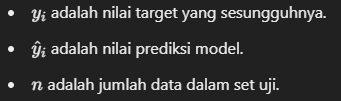

MSE mengukur seberapa besar perbedaan antara nilai yang diprediksi oleh model dan nilai yang sesungguhnya. Semakin kecil MSE, semakin baik model dalam memprediksi data yang diberikan.

---

### 2. **Root Mean Squared Error (RMSE)**

#### Persamaan:
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

#### Penjelasan:
RMSE adalah akar kuadrat dari MSE. Meskipun MSE memberikan gambaran yang baik tentang kesalahan model, RMSE lebih mudah diinterpretasikan karena berada dalam satuan yang sama dengan data asli. Semakin kecil RMSE, semakin baik model dalam memprediksi target.

---

### 3. **Koefisien Determinasi (R²)**

#### Persamaan:
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$


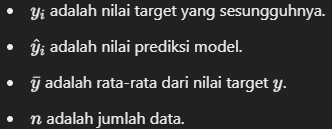

#### Penjelasan:
R² mengukur seberapa baik model dapat menjelaskan variasi dalam data. Nilai R² berkisar antara 0 dan 1:
- \(R^2 = 1\): Model sangat baik dan dapat menjelaskan seluruh variasi data.
- \(R^2 = 0\): Model tidak dapat menjelaskan variasi data lebih baik daripada model rata-rata.

---

### 4. **Loss Function (MSELoss di PyTorch)**

#### Persamaan:
$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

#### Penjelasan:
Loss function ini digunakan untuk mengukur kesalahan model selama pelatihan. Di PyTorch, ini diimplementasikan dengan fungsi `MSELoss`, yang mengukur kesalahan kuadrat rata-rata antara nilai target yang sesungguhnya dan nilai prediksi. Selama pelatihan, model akan mencoba meminimalkan nilai loss ini.

---

### 5. **Optimasi dengan Adam (Adam Optimizer)**

Adam adalah algoritma optimasi yang menggabungkan dua pendekatan: Momentum dan Adagrad. Formula untuk pembaruan parameter \( \theta \) dalam Adam adalah sebagai berikut:

#### Persamaan:
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$$
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$
$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$
$$
\theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

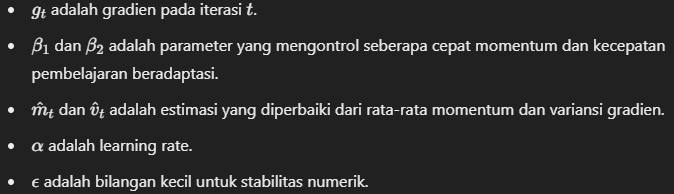

Adam digunakan untuk memperbarui bobot model selama pelatihan dengan memanfaatkan estimasi rata-rata momentum dan gradien untuk membuat pembaruan lebih efisien.

---

### 6. **Fungsi Aktivasi LeakyReLU**

#### Persamaan:
$$
f(x) =
\begin{cases}
x & \text{jika } x > 0 \\
\alpha x & \text{jika } x \leq 0
\end{cases}
$$

- \(x\) adalah input.
- \(\alpha\) adalah konstanta kecil, yang biasanya diatur ke 0.2.

LeakyReLU adalah fungsi aktivasi yang memungkinkan sebagian kecil nilai negatif untuk lewat, menghindari masalah "vanishing gradient" yang dapat terjadi pada fungsi ReLU biasa. Ini membuatnya lebih efektif pada jaringan yang dalam.

---

### 7. **Dropout**

Dropout adalah teknik regulasi yang digunakan untuk mencegah overfitting dengan "menghapus" (set ke 0) unit (neuron) secara acak selama pelatihan. Pada setiap langkah pelatihan, beberapa neuron yang dipilih secara acak tidak aktif. Hal ini mencegah model bergantung pada fitur tertentu dan membantu generalisasi.

---

Berikut adalah kesimpulan dari pembahasan yang telah dilakukan:

### Kesimpulan:
1. **Model PyTorch dan TensorFlow**:
   - Kedua model yang dibangun menggunakan PyTorch dan TensorFlow untuk prediksi regresi menunjukkan hasil yang baik meskipun terdapat perbedaan dalam cara mereka menangani data dan proses pelatihan.
   - Model **PyTorch** menggunakan arsitektur sederhana dengan lapisan fully connected (dense), aktivasi ReLU, dan optimisasi dengan Adam. Hasil evaluasi menunjukkan nilai **RMSE** sekitar 0.3715 dan **R²** sekitar 0.4480.
   - Model **TensorFlow** menggunakan arsitektur serupa namun dengan tambahan BatchNormalization, LeakyReLU, dan Dropout untuk regularisasi. Hasil evaluasi menunjukkan **RMSE** sekitar 0.2330 dan **R²** sekitar 0.7829, yang menunjukkan bahwa model ini lebih efektif dalam memprediksi target dibandingkan model PyTorch.

2. **Evaluasi Kinerja**:
   - Kedua model memiliki performa yang solid, namun model TensorFlow memberikan hasil evaluasi yang lebih baik, terutama dengan nilai **R²** yang lebih tinggi, yang mengindikasikan prediksi model yang lebih akurat terhadap data uji.
   - **RMSE** yang lebih rendah pada model TensorFlow menunjukkan bahwa model ini memiliki kesalahan prediksi yang lebih kecil dibandingkan dengan model PyTorch.

3. **Penerapan dan Pengembangan Lebih Lanjut**:
   - Untuk penerapan lebih lanjut, perbaikan model bisa dilakukan dengan mengatur parameter seperti learning rate, batch size, atau mencoba arsitektur model yang lebih kompleks.
   - Selain itu, regularisasi tambahan (seperti dropout dan L2 regularization) dapat diterapkan untuk meningkatkan generalisasi model.

Secara keseluruhan, kedua model berhasil melakukan tugas prediksi dengan baik, namun model TensorFlow memiliki keunggulan dalam hal akurasi prediksi.

Apakah ada tambahan yang ingin Anda masukkan atau hal lain yang perlu diperjelas?